#### National_MRA_clean_EDA
##### Tetiana Fesenko

##### The key steps involved in this process:

1. Training the Model (1995-2020):

 - We will use data from the years 1995 to 2020 to train a machine learning model.
 - The features will include various parameters such as location, product, unit_quantity, unit, category, and date, while the target variable is the price.

2. Predicting Prices for 2021 and 2022:

After training the model, we will apply it to the data for the years 2021 and 2022 to obtain predicted prices.

3. Evaluating Model Accuracy:

We will then compare the predicted prices for 2021 and 2022 with the actual prices for the same years to evaluate the accuracy of the model.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
#Load the dataset
df_national_MRA = pd.read_csv('/Users/tativalentine/ict-food-cost-planner-project/data_sources/clean_data/national_MRA_clean.csv')
df_national_MRA

,date,location,vectorid,price,product,unit_quantity,unit,category
0,1995-01-01,Canada,v735165,10.17,Round steak,1.0,kilogram,Protein
1,1995-01-01,Canada,v735176,11.25,Sirloin steak,1.0,kilogram,Protein
2,1995-01-01,Canada,v735187,12.08,Prime rib roast,1.0,kilogram,Protein
3,1995-01-01,Canada,v735198,7.23,Blade roast,1.0,kilogram,Protein
4,1995-01-01,Canada,v735209,7.12,Stewing beef,1.0,kilogram,Protein
...,...,...,...,...,...,...,...,...
15649,2022-02-01,Canada,v735202,7.10,"Coffee, instant",200.0,grams,Beverages
15650,2022-02-01,Canada,v735203,4.49,Tea,72.0,bags,Beverages
15651,2022-02-01,Canada,v735204,4.45,Cooking or salad oil,1.0,litre,Oils
15652,2022-02-01,Canada,v735205,1.28,"Soup, canned",284.0,millilitres,Other_foods


In [4]:
# Descriptive Statistics
print(df_national_MRA.describe())

              price  unit_quantity
count  15654.000000   15654.000000
mean       4.439426     148.777294
std        4.614685     226.969813
min        0.580000       1.000000
25%        1.750000       1.000000
50%        2.910000       1.360000
75%        4.890000     284.000000
max       44.820000     796.000000


In [5]:
# Convert 'date' in a datetime column
df_national_MRA['date'] = pd.to_datetime(df_national_MRA['date'])

In [6]:
# Split the data into training (1995-2020) and testing (2021-2022) sets
train_data = df_national_MRA[df_national_MRA['date'].dt.year < 2021]
test_data = df_national_MRA[df_national_MRA['date'].dt.year.isin([2021, 2022])]

In [7]:
# Feature columns (exclude 'price' and 'date' for simplicity)
feature_columns = ['location', 'product', 'unit_quantity', 'unit', 'category']

In [8]:
# Target column
target_column = 'price'

In [9]:
# Concatenate the training and testing datasets
concatenated_data = pd.concat([train_data, test_data])

In [10]:
# Check if feature columns are present in the DataFrame
missing_columns = set(feature_columns) - set(concatenated_data.columns)
if missing_columns:
    print(f"Columns {missing_columns} are not present in the DataFrame.")
else:
# Convert categorical columns to numerical using one-hot encoding
    concatenated_data = pd.get_dummies(concatenated_data, columns=feature_columns, drop_first=True)


In [11]:
# Split into features and target again
X_train = concatenated_data[concatenated_data['date'].dt.year < 2021].drop(columns=[target_column, 'date', 'vectorid'])
X_test = concatenated_data[concatenated_data['date'].dt.year.isin([2021, 2022])].drop(columns=[target_column, 'date', 'vectorid'])
y_train = concatenated_data[concatenated_data['date'].dt.year < 2021][target_column]
y_test = concatenated_data[concatenated_data['date'].dt.year.isin([2021, 2022])][target_column]

### Random Forest 

In [12]:
# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [14]:
# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [15]:
# Display evaluation metrics
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.4f}')

Mean Absolute Error: 2.15
Mean Squared Error: 15.91
R-squared: 0.7064


#### Conclusion

1. Mean Absolute Error (MAE): 2.15

This represents the average absolute difference between the actual and predicted prices. A lower MAE indicates better accuracy.

2. Mean Squared Error (MSE): 15.91

MSE measures the average squared difference between the actual and predicted prices. While it gives more weight to larger errors, it might be influenced by outliers.

3. R-squared (R2): 0.7064

R-squared represents the proportion of the variance in the dependent variable (price) that is predictable from the independent variables. An R-squared value closer to 1 indicates a better fit. In this case, 70.64% of the variance in price can be explained by the model.
Overall, the R2 value of 0.7064 suggests that your Random Forest Regression model is explaining a significant portion of the variance in the prices. 

### Visualizing predictions


In [16]:
# Create a DataFrame to store actual and predicted prices
compare_prices = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

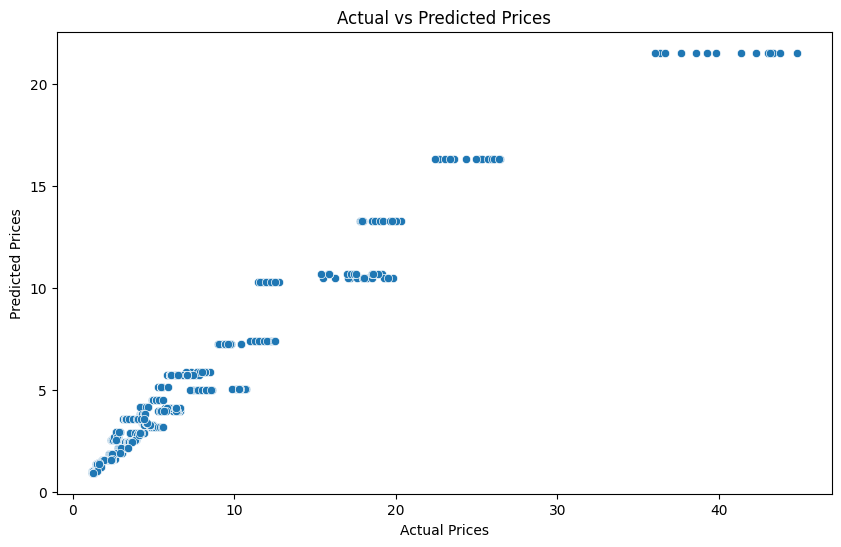

In [17]:
# Plot the actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=compare_prices)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

#### Line Plot

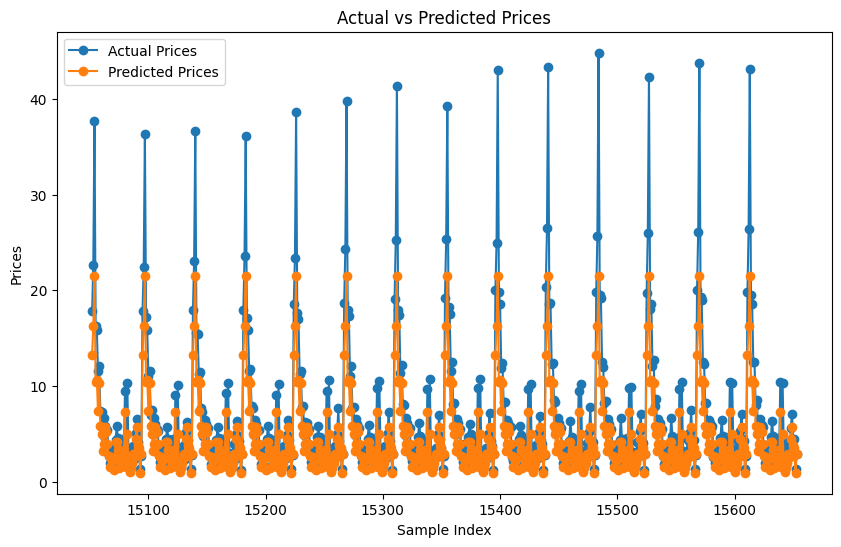

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(compare_prices['Actual'], label='Actual Prices', marker='o')
plt.plot(compare_prices['Predicted'], label='Predicted Prices', marker='o')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Sample Index')
plt.ylabel('Prices')
plt.legend()
plt.show()


#### Bar Plot for Comparison

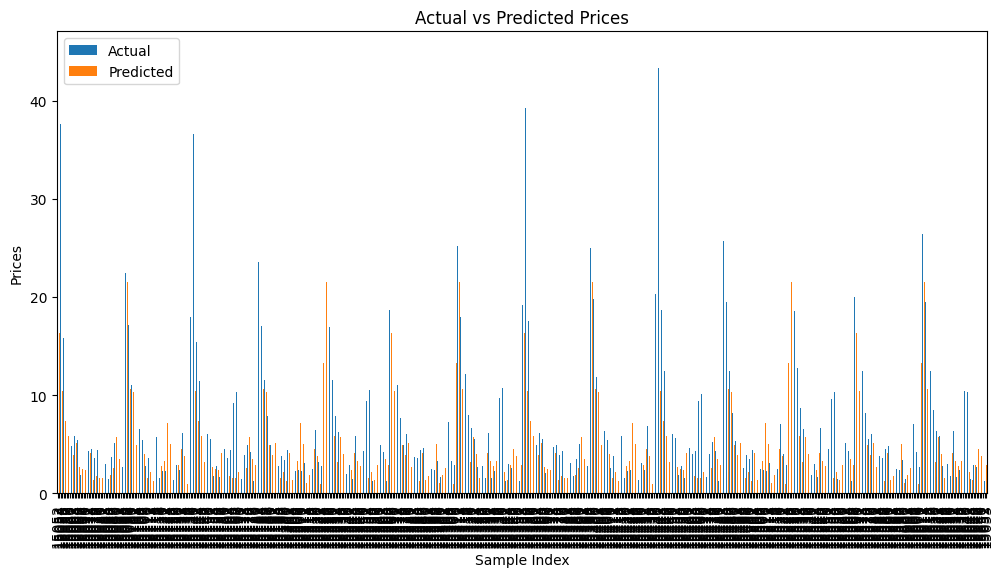

In [19]:
compare_prices.plot(kind='bar', figsize=(12, 6))
plt.title('Actual vs Predicted Prices')
plt.xlabel('Sample Index')
plt.ylabel('Prices')
plt.show()


#### Error Line Plot


In [20]:
# Calculate residuals
compare_prices['Residuals'] = compare_prices['Actual'] - compare_prices['Predicted']

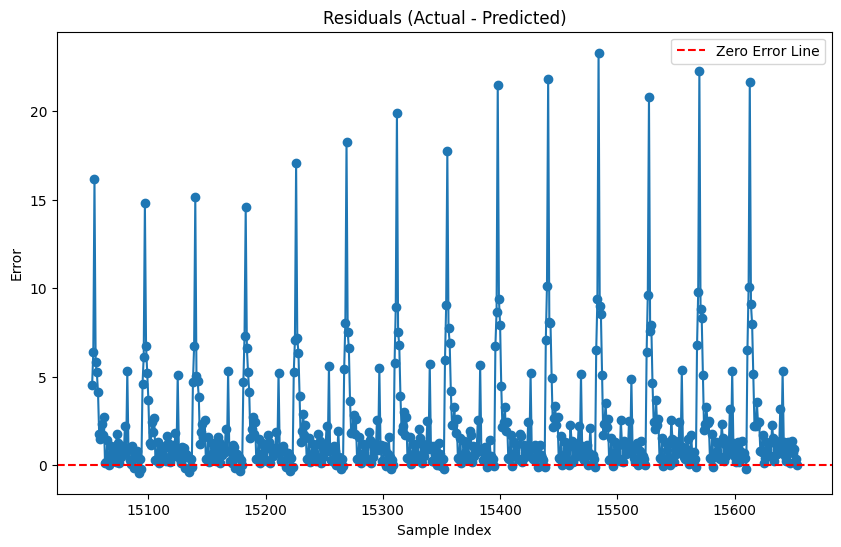

In [21]:
# Line Plot of Residuals
plt.figure(figsize=(10, 6))
plt.plot(compare_prices['Residuals'], marker='o')
plt.axhline(0, color='red', linestyle='--', label='Zero Error Line')
plt.title('Residuals (Actual - Predicted)')
plt.xlabel('Sample Index')
plt.ylabel('Error')
plt.legend()
plt.show()


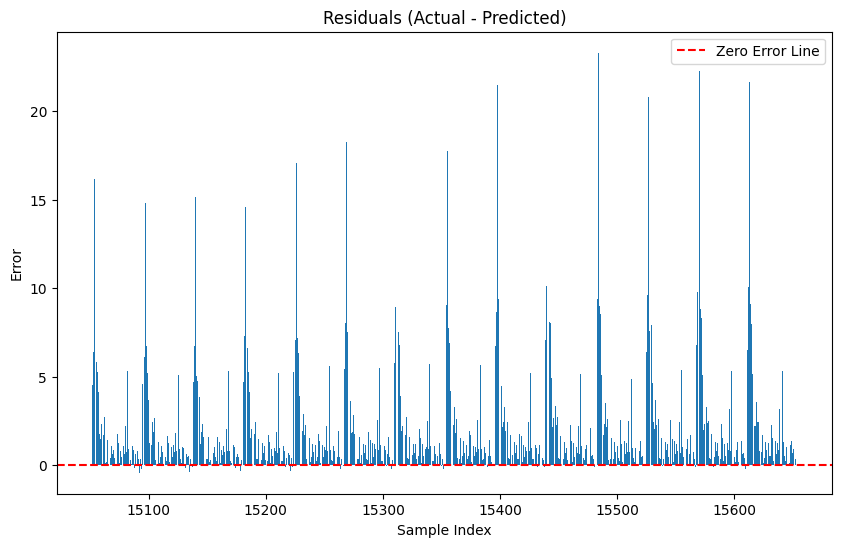

In [22]:
# Bar Plot of Residuals
plt.figure(figsize=(10, 6))
plt.bar(compare_prices.index, compare_prices['Residuals'])
plt.axhline(0, color='red', linestyle='--', label='Zero Error Line')
plt.title('Residuals (Actual - Predicted)')
plt.xlabel('Sample Index')
plt.ylabel('Error')
plt.legend()
plt.show()


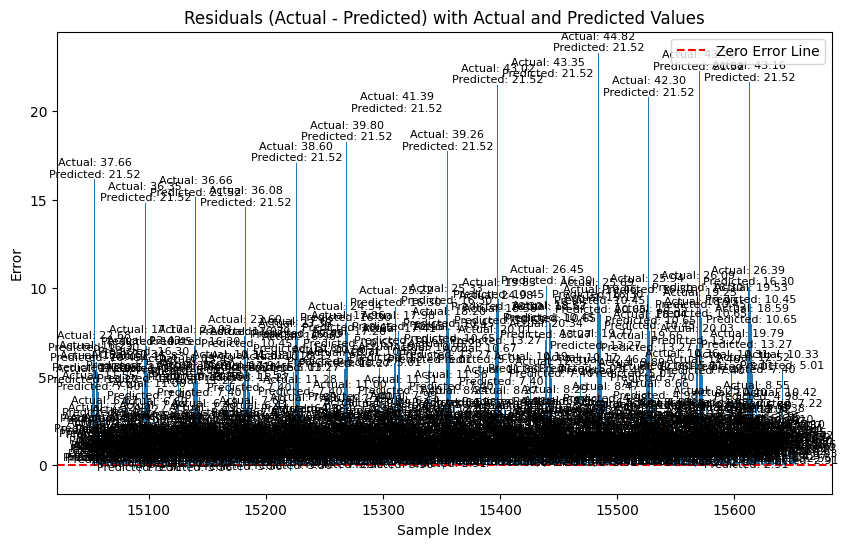

In [23]:
# Bar Plot of Residuals with Actual and Predicted Values
plt.figure(figsize=(10, 6))
bars = plt.bar(compare_prices.index, compare_prices['Residuals'])

# Annotate each bar with actual and predicted values
for bar, actual, predicted in zip(bars, compare_prices['Actual'], compare_prices['Predicted']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'Actual: {actual:.2f}\nPredicted: {predicted:.2f}', 
             ha='center', va='bottom', color='black', fontsize=8)

plt.axhline(0, color='red', linestyle='--', label='Zero Error Line')
plt.title('Residuals (Actual - Predicted) with Actual and Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Error')
plt.legend()
plt.show()


### Select smaller random data set portion

In [24]:
import numpy as np

In [25]:
# Randomly sample a subset of the data
sample_size = 100  
random_indices = np.random.choice(compare_prices.index, size=sample_size, replace=False)
subset_compare_prices = compare_prices.loc[random_indices]

In [26]:
# Define the number of subplots
num_subplots = 4
subplot_height = sample_size // num_subplots

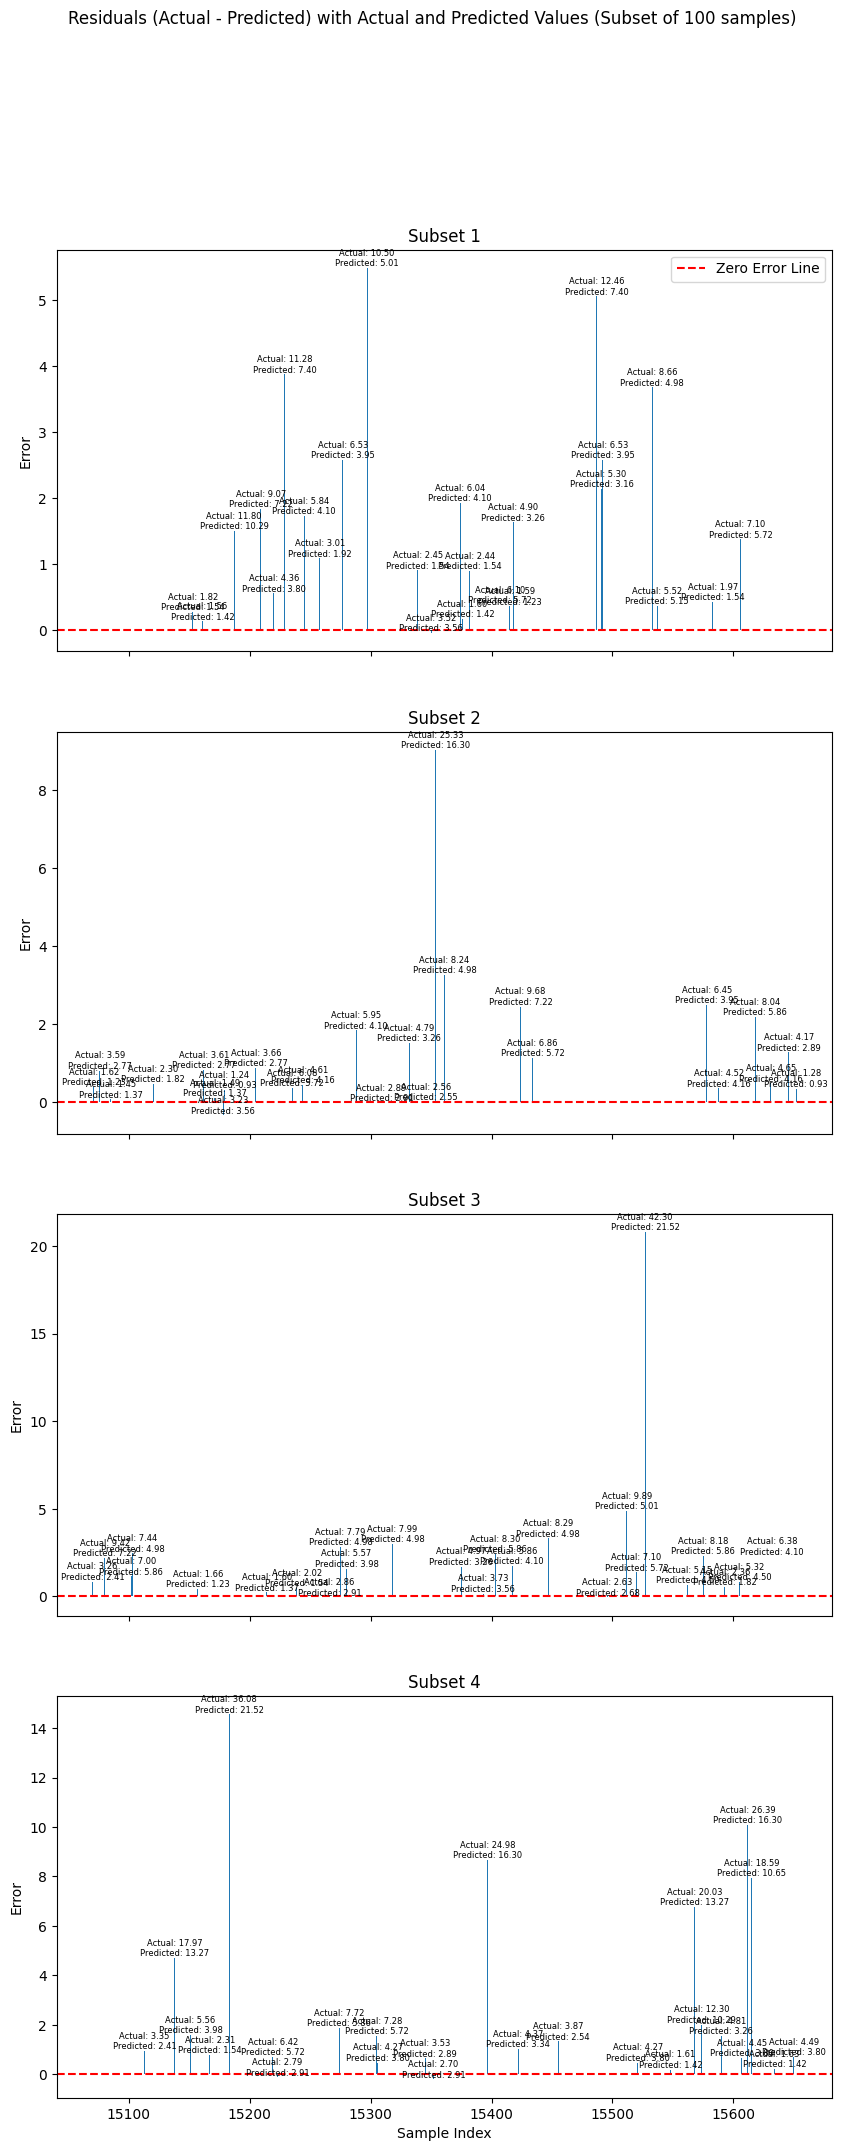

In [27]:
# Create subplots
fig, axes = plt.subplots(num_subplots, 1, figsize=(10, 6*num_subplots), sharex=True)

# Plot each subplot
for i in range(num_subplots):
    start_idx = i * subplot_height
    end_idx = (i + 1) * subplot_height
    subset = subset_compare_prices.iloc[start_idx:end_idx]

    # Bar Plot of Residuals with Actual and Predicted Values for the subset
    bars = axes[i].bar(subset.index, subset['Residuals'])
    
    # Annotate each bar with actual and predicted values
    for bar, actual, predicted in zip(bars, subset['Actual'], subset['Predicted']):
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2, height, f'Actual: {actual:.2f}\nPredicted: {predicted:.2f}', 
                     ha='center', va='bottom', color='black', fontsize=6)

    axes[i].axhline(0, color='red', linestyle='--', label='Zero Error Line')
    axes[i].set_title(f'Subset {i + 1}')
    axes[i].set_ylabel('Error')

# Set common xlabel and legend for all subplots
plt.xlabel('Sample Index')
axes[0].legend()

plt.suptitle(f'Residuals (Actual - Predicted) with Actual and Predicted Values (Subset of {sample_size} samples)')
plt.show()


### XGBoost Regressor

In [28]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
# Concatenate the training and testing datasets
concatenated_data = pd.concat([train_data, test_data])

In [30]:
# Split into features and target again
X_train = concatenated_data[concatenated_data['date'].dt.year < 2021].drop(columns=[target_column, 'date', 'vectorid'])
X_test = concatenated_data[concatenated_data['date'].dt.year.isin([2021, 2022])].drop(columns=[target_column, 'date', 'vectorid'])
y_train = concatenated_data[concatenated_data['date'].dt.year < 2021][target_column]
y_test = concatenated_data[concatenated_data['date'].dt.year.isin([2021, 2022])][target_column]


In [31]:
# Initialize and train the XGBoost model
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:location: object, product: object, unit: object, category: object

In [ ]:
# Make predictions on the test set
predictions_xgb = model.predict(X_test)

In [ ]:
# Evaluate the XGBoost model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)


In [ ]:
# Display evaluation metrics for XGBoost
print('XGBoost Regressor:')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.4f}')

XGBoost Regressor:
Mean Absolute Error: 2.15
Mean Squared Error: 15.90
R-squared: 0.7065


#### Results:

Mean Absolute Error (MAE). The average absolute difference between the predicted and actual prices is 2.15. It measures the average magnitude of errors.

Mean Squared Error (MSE). The average of the squared differences between the predicted and actual prices is 15.91. It penalizes larger errors more heavily than MAE.

R-squared (R2): The coefficient of determination is 0.7064. It represents the proportion of the variance in the dependent variable (price) that is predictable from the independent variables. An R-squared of 0.7064 indicates a moderately good fit.

!!! In summary, my XGBoost Regressor model seems to perform well, capturing a substantial portion of the variance in the prices.

### XGBoost Regressor Visualization

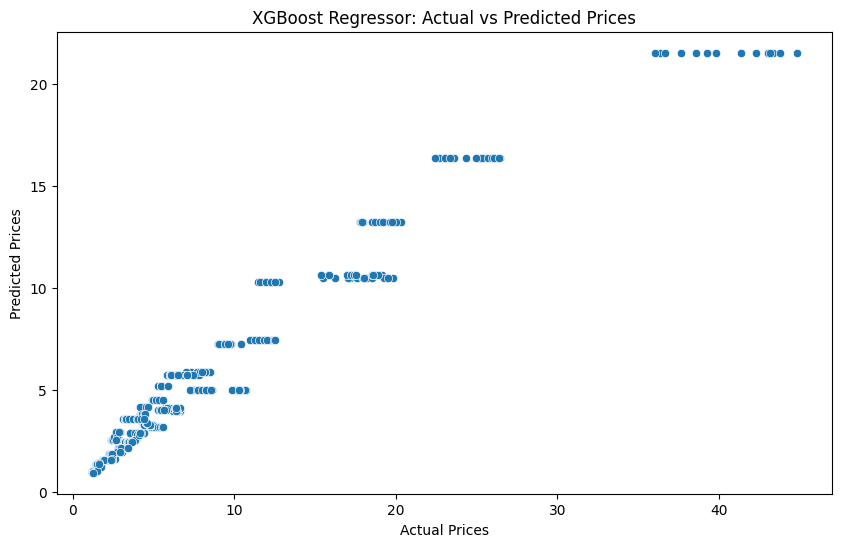

In [ ]:
# Scatter plot for XGBoost Regressor
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.title('XGBoost Regressor: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

### Decision Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Split into features and target again
X_train = concatenated_data[concatenated_data['date'].dt.year < 2021].drop(columns=[target_column, 'date', 'vectorid'])
X_test = concatenated_data[concatenated_data['date'].dt.year.isin([2021, 2022])].drop(columns=[target_column, 'date', 'vectorid'])
y_train = concatenated_data[concatenated_data['date'].dt.year < 2021][target_column]
y_test = concatenated_data[concatenated_data['date'].dt.year.isin([2021, 2022])][target_column]

In [ ]:
# Initialize and train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
predictions_dt = model.predict(X_test)

In [ ]:
# Evaluate the Decision Tree model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)


In [ ]:
# Display evaluation metrics for Decision Tree
print('\nDecision Tree Regressor:')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.4f}')


Decision Tree Regressor:
Mean Absolute Error: 2.15
Mean Squared Error: 15.90
R-squared: 0.7065


###
Mean Absolute Error (MAE). The average absolute difference between the predicted and actual prices is 2.15. It measures the average magnitude of errors.

Mean Squared Error (MSE). The average of the squared differences between the predicted and actual prices is 15.90. It penalizes larger errors more heavily than MAE.

R-squared (R2). The coefficient of determination is 0.7065. It represents the proportion of the variance in the dependent variable (price) that is predictable from the independent variables. An R-squared of 0.7065 indicates a moderately good fit.

### Decision Tree regression visualization

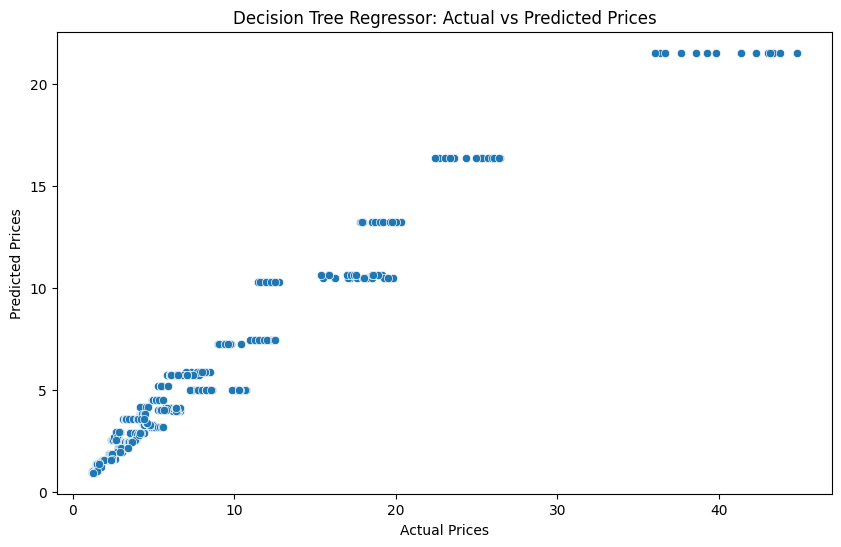

In [ ]:
# Scatter plot for Decision Tree regressor
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions_dt)
plt.title('Decision Tree Regressor: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


### Let's compare the prediction models and add visuals

In [ ]:
# Create a DataFrame for visualization
compare_prices_xgb = pd.DataFrame({'Actual': y_test, 'XGBoost Predicted': predictions_xgb})
compare_prices_dt = pd.DataFrame({'Actual': y_test, 'Decision Tree Predicted': predictions_dt})

In [ ]:
# Plot bar plots for XGBoost and Decision Tree
plt.figure(figsize=(25, 8))

<Figure size 2500x800 with 0 Axes>

<Figure size 2500x800 with 0 Axes>

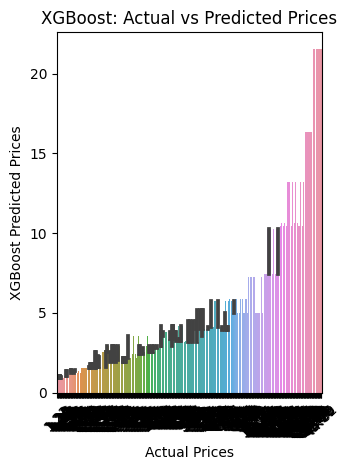

In [ ]:
# XGBoost
plt.subplot(1, 2, 1)
sns.barplot(x='Actual', y='XGBoost Predicted', data=compare_prices_xgb)
plt.title('XGBoost: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('XGBoost Predicted Prices')

# Rotate x-axis labels 
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Sample 20 random rows from your DataFrame
sampled_data = concatenated_data.sample(n=20, random_state=42)

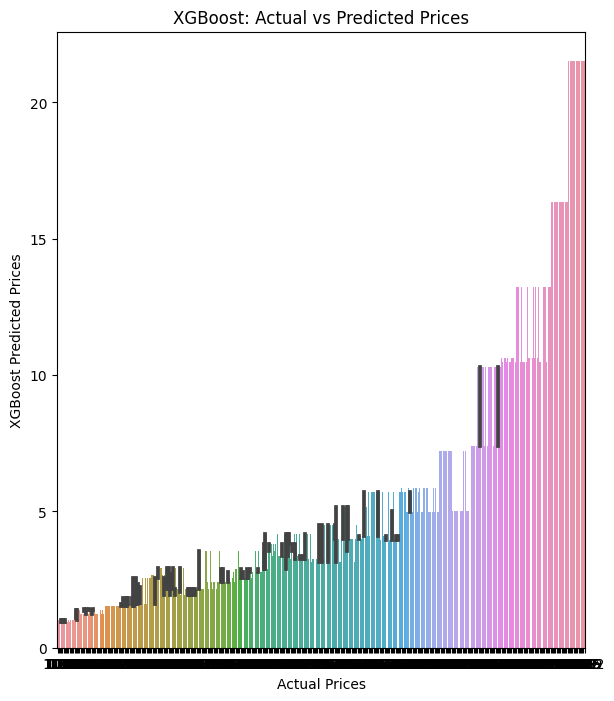

In [ ]:
# Set a larger figure size
plt.figure(figsize=(15, 8))

# XGBoost
plt.subplot(1, 2, 1)
sns.barplot(x='Actual', y='XGBoost Predicted', data=compare_prices_xgb)
plt.title('XGBoost: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('XGBoost Predicted Prices')

plt.show()

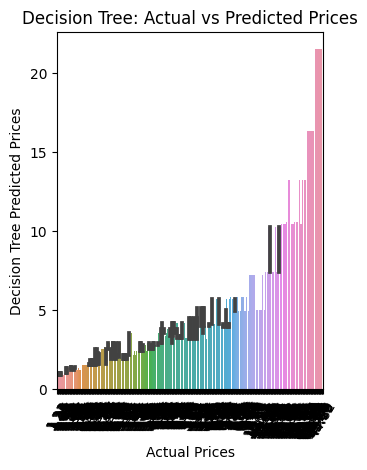

In [ ]:
# Decision Tree
plt.subplot(1, 2, 2)
sns.barplot(x='Actual', y='Decision Tree Predicted', data=compare_prices_dt)
plt.title('Decision Tree: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Decision Tree Predicted Prices')

# Rotate x-axis labels 
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

## Conclusion:

1. Consistency Across Models:

Both the Decision Tree Regressor and XGBoost Regressor exhibit similar performance metrics, with nearly identical Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared values.
The consistency in results suggests that the models capture the underlying patterns in the data effectively.

2. Model Accuracy:

The MAE of 2.15 indicates that, on average, the predicted prices deviate by approximately $2.15 from the actual prices.
The MSE values around 15.90-15.91 suggest moderate dispersion of errors, with larger errors having a more substantial impact.

3. R-squared Interpretation:

The R-squared values of approximately 0.7064-0.7065 signify that around 70.64-70.65% of the variance in prices can be explained by the independent variables included in the models.
This indicates a reasonably good fit of the models to the data.

4. Further Exploration:

While the models provide valuable insights, it's essential to continue exploring other predictive models and refining the features to potentially enhance predictive accuracy.

# EDA National MRA Dataset

In [32]:
df_national_MRA

,date,location,vectorid,price,product,unit_quantity,unit,category
0,1995-01-01,Canada,v735165,10.17,Round steak,1.0,kilogram,Protein
1,1995-01-01,Canada,v735176,11.25,Sirloin steak,1.0,kilogram,Protein
2,1995-01-01,Canada,v735187,12.08,Prime rib roast,1.0,kilogram,Protein
3,1995-01-01,Canada,v735198,7.23,Blade roast,1.0,kilogram,Protein
4,1995-01-01,Canada,v735209,7.12,Stewing beef,1.0,kilogram,Protein
...,...,...,...,...,...,...,...,...
15649,2022-02-01,Canada,v735202,7.10,"Coffee, instant",200.0,grams,Beverages
15650,2022-02-01,Canada,v735203,4.49,Tea,72.0,bags,Beverages
15651,2022-02-01,Canada,v735204,4.45,Cooking or salad oil,1.0,litre,Oils
15652,2022-02-01,Canada,v735205,1.28,"Soup, canned",284.0,millilitres,Other_foods


In [33]:
# Data Summary
print(df_national_MRA.info())
print(df_national_MRA.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15654 entries, 0 to 15653
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           15654 non-null  datetime64[ns]
 1   location       15654 non-null  object        
 2   vectorid       15654 non-null  object        
 3   price          15654 non-null  float64       
 4   product        15654 non-null  object        
 5   unit_quantity  15654 non-null  float64       
 6   unit           15654 non-null  object        
 7   category       15654 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 978.5+ KB
None
        date location vectorid  price          product  unit_quantity  \
0 1995-01-01   Canada  v735165  10.17      Round steak            1.0   
1 1995-01-01   Canada  v735176  11.25    Sirloin steak            1.0   
2 1995-01-01   Canada  v735187  12.08  Prime rib roast            1.0   
3 1995-01-01

In [34]:
# Statistical Summary
print(df_national_MRA.describe())

              price  unit_quantity
count  15654.000000   15654.000000
mean       4.439426     148.777294
std        4.614685     226.969813
min        0.580000       1.000000
25%        1.750000       1.000000
50%        2.910000       1.360000
75%        4.890000     284.000000
max       44.820000     796.000000


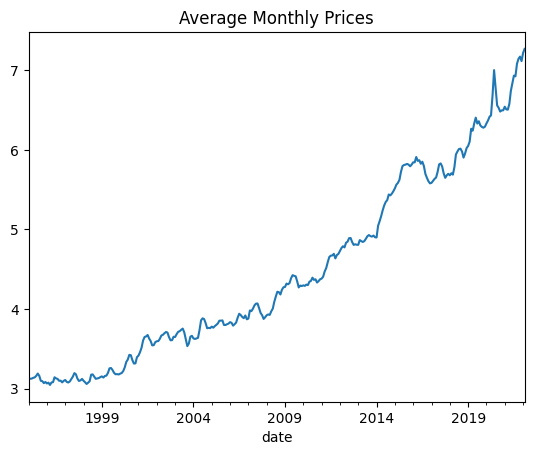

In [35]:
# Temporal Analysis
df_national_MRA['date'] = pd.to_datetime(df_national_MRA['date'])
df_national_MRA.set_index('date', inplace=True)
monthly_prices = df_national_MRA['price'].resample('M').mean()
monthly_prices.plot(title='Average Monthly Prices')
plt.show()

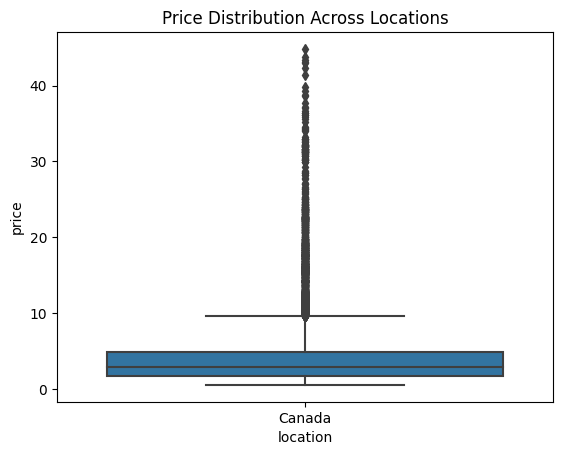

In [36]:
# Location Analysis
sns.boxplot(x='location', y='price', data=df_national_MRA)
plt.title('Price Distribution Across Locations')
plt.show()

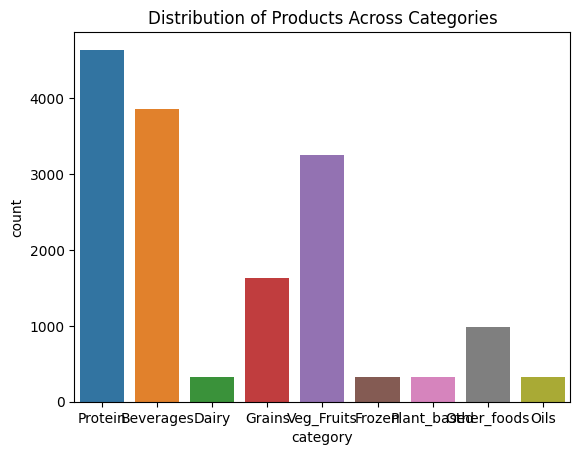

In [37]:
# Product Category Analysis
sns.countplot(x='category', data=df_national_MRA)
plt.title('Distribution of Products Across Categories')
plt.show()

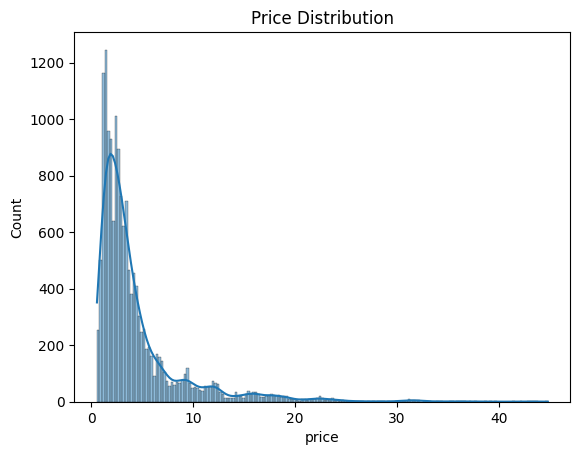

In [38]:
# Price Distribution
sns.histplot(df_national_MRA['price'], kde=True)
plt.title('Price Distribution')
plt.show()

/var/folders/nf/rr1y3sz51_d8gbgc735ltjtc0000gn/T/ipykernel_38283/1594650430.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_national_MRA.corr()


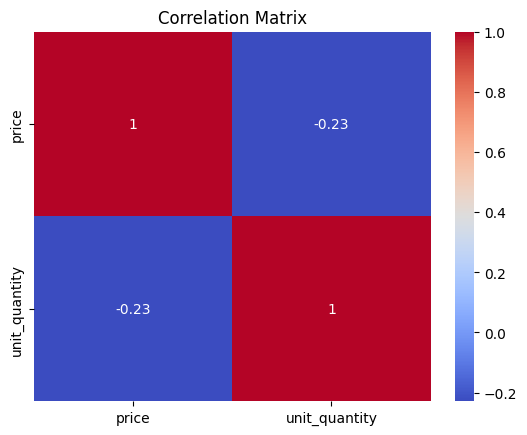

In [39]:
# Correlation Analysis
correlation_matrix = df_national_MRA.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

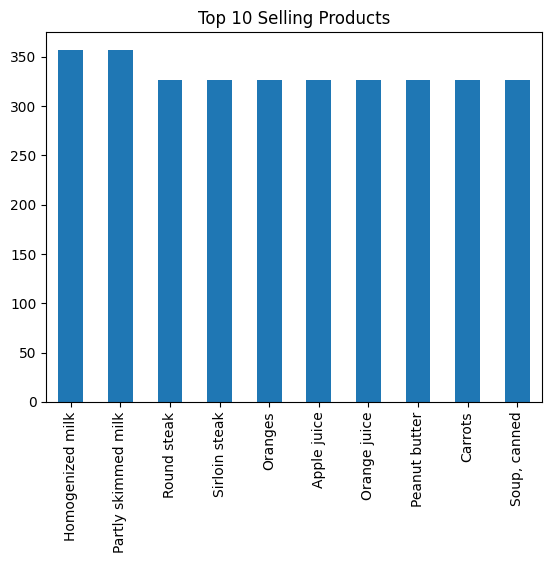

In [40]:
# Top Products
top_products = df_national_MRA['product'].value_counts().nlargest(10)
top_products.plot(kind='bar', title='Top 10 Selling Products')
plt.show()

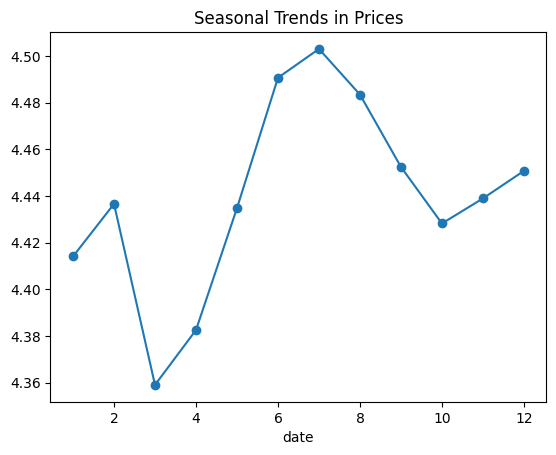

In [41]:
# Seasonal Trends
seasonal_trends = df_national_MRA.groupby(df_national_MRA.index.month)['price'].mean()
seasonal_trends.plot(kind='line', marker='o', title='Seasonal Trends in Prices')
plt.show()

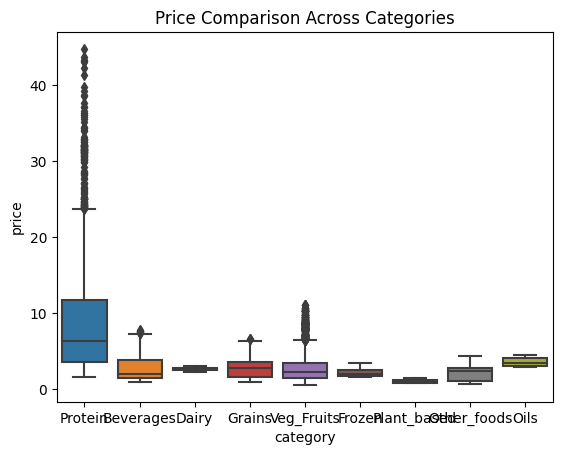

In [42]:
# Comparative Analysis
sns.boxplot(x='category', y='price', data=df_national_MRA)
plt.title('Price Comparison Across Categories')
plt.show()